# **Bitcoin Price Prediction Using RNN and LSTM**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('BTC-USD 2.csv', date_parser = True) 
# date_parser automatically identifies dates in the dataset and converts them into date type object 

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2075,2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10
2076,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,3.251880e+10
2077,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10
2078,2020-05-26,8909.585938,8991.967773,8757.293945,8835.052734,8835.052734,2.958419e+10
2079,2020-05-27,8837.380859,9203.320313,8834.157227,9181.017578,9181.017578,3.274054e+10


In [5]:
#data.iloc[2200:]

In [6]:
data_training = data[data['Date']< '2020-01-01'].copy()

In [7]:
data_training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [8]:
data_training.shape

(1932, 7)

In [9]:
data_test = data[data['Date']>= '2020-01-01'].copy()

In [10]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1932,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,1.856566e+10
1933,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,2.080208e+10
1934,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,2.811148e+10
1935,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,1.844427e+10
1936,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10


In [46]:
data_test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2075,2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10
2076,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,3.251880e+10
2077,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10
2078,2020-05-26,8909.585938,8991.967773,8757.293945,8835.052734,8835.052734,2.958419e+10
2079,2020-05-27,8837.380859,9203.320313,8834.157227,9181.017578,9181.017578,3.274054e+10


In [11]:
data_test.shape

(148, 7)

In [12]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [13]:
training_data.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800.0
1,456.859985,456.859985,413.104004,424.440002,34483200.0
2,424.102997,427.834991,384.532013,394.795990,37919700.0
3,394.673004,423.295990,389.882996,408.903992,36863600.0
4,408.084991,412.425995,393.181000,398.821014,26580100.0


# **Normalization**

In [14]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

In [15]:
training_data

array([[1.49732345e-02, 1.29013200e-02, 1.49400698e-02, 1.44534769e-02,
        3.35749244e-04],
       [1.45066780e-02, 1.23321258e-02, 1.28489753e-02, 1.27508263e-02,
        6.33453324e-04],
       [1.28093283e-02, 1.08719155e-02, 1.13293978e-02, 1.12164013e-02,
        7.09650970e-04],
       ...,
       [3.70008086e-01, 3.67365217e-01, 3.78051927e-01, 3.74990337e-01,
        4.97548412e-01],
       [3.75325771e-01, 3.64390763e-01, 3.77862744e-01, 3.68279031e-01,
        5.07057851e-01],
       [3.68805505e-01, 3.58377151e-01, 3.72197021e-01, 3.63134123e-01,
        4.69226533e-01]])

In [16]:
training_data.shape[0]

1932

##**Converting it to Time Series data**

In [17]:
# converting it to Time series data
X_train = [] 
Y_train = []
for i in range(60, training_data.shape[0]):
   X_train.append(training_data[i-60:i])
   Y_train.append(training_data[i,0])

In [18]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [19]:
X_train.shape

(1872, 60, 5)

In [20]:
X_train[0][0]

array([0.01497323, 0.01290132, 0.01494007, 0.01445348, 0.00033575])

In [21]:
Y_train.shape

(1872,)

In [22]:
Y_train[0]

0.010250997169358496

# **Model Building**

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [24]:
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units = 1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [26]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [27]:
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.2)

Epoch 1/20
30/30 [==============================] - 12s 239ms/step - loss: 0.0216 - val_loss: 0.0550
Epoch 2/20
30/30 [==============================] - 6s 217ms/step - loss: 0.0082 - val_loss: 0.0056
Epoch 3/20
30/30 [==============================] - 7s 226ms/step - loss: 0.0041 - val_loss: 0.0029
Epoch 4/20
30/30 [==============================] - 7s 225ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 5/20
30/30 [==============================] - 7s 232ms/step - loss: 0.0037 - val_loss: 0.0130
Epoch 6/20
30/30 [==============================] - 7s 236ms/step - loss: 0.0033 - val_loss: 0.0113
Epoch 7/20
30/30 [==============================] - 7s 226ms/step - loss: 0.0037 - val_loss: 0.0055
Epoch 8/20
30/30 [==============================] - 7s 243ms/step - loss: 0.0032 - val_loss: 0.0063
Epoch 9/20
30/30 [==============================] - 7s 236ms/step - loss: 0.0030 - val_loss: 0.0044
Epoch 10/20
30/30 [==============================] - 7s 227ms/step - loss: 0.0028 - val_loss: 0.006

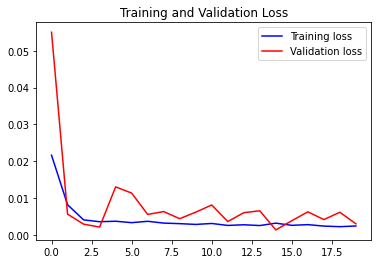

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# **Test Dataset**

In [29]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)

In [30]:
df.head()

,Open,High,Low,Close,Volume
0,9259.783203,9377.486328,9249.587891,9324.717773,2.124268e+10
1,9324.787109,9379.806641,9141.251953,9235.354492,2.113222e+10
2,9235.607422,9505.051758,9191.485352,9412.612305,2.617026e+10
3,9413.004883,9457.417969,9256.931641,9342.527344,2.619861e+10
4,9340.864258,9423.237305,9305.909180,9360.879883,2.313390e+10


In [31]:
# Normalizing test data
inputs = scaler.transform(df) 
print(inputs)

[[0.4706426  0.46111744 0.48280998 0.47344448 0.47088353]
 [0.47401087 0.46123417 0.47704822 0.46881889 0.4684344 ]
 [0.4693899  0.46753509 0.47971984 0.47799406 0.58014293]
 ...
 [0.44609842 0.43966175 0.45462663 0.45181931 0.69362236]
 [0.45249663 0.44172249 0.45662774 0.44809858 0.65584016]
 [0.44875522 0.45235537 0.46071565 0.46600631 0.72582603]]


In [32]:
# Converting test data into time series data
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
  X_test.append(inputs[i-60:i]) 
  Y_test.append(inputs[i, 0])

In [33]:
X_test, Y_test = np.array(X_test), np.array(Y_test) 
X_test.shape, Y_test.shape

((148, 60, 5), (148,))

In [34]:
Y_pred = model.predict(X_test) 

In [41]:
Y_pred.shape

(148, 1)

In [35]:
scaler.scale_

array([5.18164146e-05, 5.03087220e-05, 5.31841635e-05, 5.17617168e-05,
       2.21730382e-11])

In [36]:
scale = 1/5.18164146e-05

In [37]:
Y_test = Y_test*scale 
Y_pred = Y_pred*scale

In [45]:
Y_pred[120]

array([nan], dtype=float32)

In [39]:
Y_test[0]

7017.9950906047625

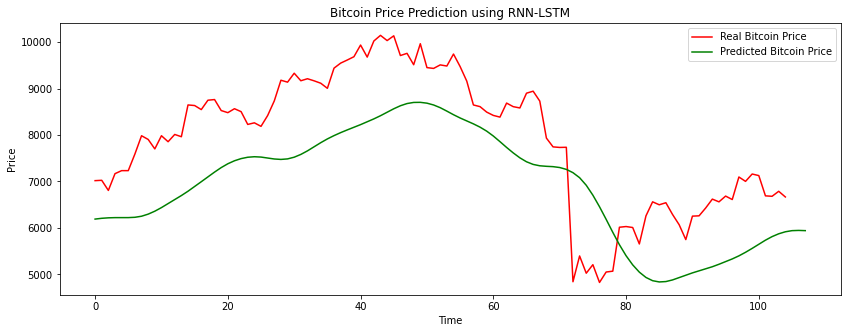

In [44]:
plt.figure(figsize=(14,5))
plt.plot(Y_test[:105], color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()